<a href="https://colab.research.google.com/github/Swapnil-tripathi/Predictive-Modelling-for-Covid-19-Diagnosis/blob/main/ML_CAPSTONE_PROJECT_COVID_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***COVID19 PREDICTION SYSTEM***

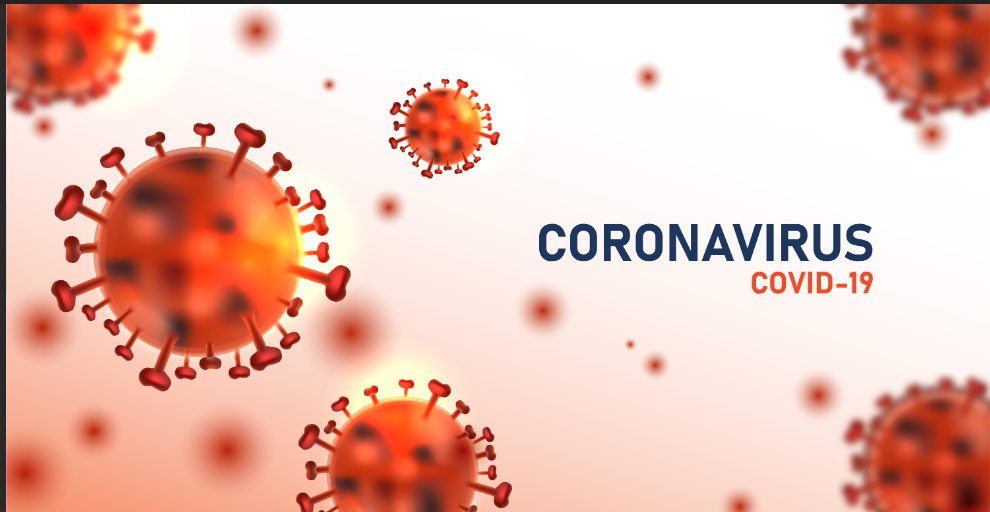

**1. Introduction:**

* In this project, I'm going to create a precise and effective machine learning model that will pedict whether an individual is covid positive or not.
* Covid19 prediction model is more important as the world is still combating with its various variants active in different regions of the world.
* It is important to improve the efficiency and speed of Covid19 diagnosis through the use of different machine learning algorithms, thereby assisting in efficient medical care and easing the strain on healthcare systems.

***Importance in Today's World:***

* Traditional diagnostic approaches like PCR testing involves lengthy laboratory processes and testing capacity of some labs are not that much good.

* So there is an urgent requirement of effective and trustworthy diagnostic techniques as the COVID19 has overrun healthcare systems globally.

* By creating a machine learning model for COVID-19 prediction we can eliminate the need for comprehensive laboratory tests and these models will also deliver quick and precise diagnoses based on their symptoms.


***Improving Medical Treatment:***

* The implementation of a COVID-19 prediction system in the medical field holds transformative potential.

* The most important factor in enhancing the effectiveness of medical treatment is accurate illness prognosis.

*  ML model aids in resource allocation, optimizing testing and treatment efforts, and ultimately contributes to reducing the overall healthcare burden associated with the pandemic.

***Impact on the Medical Field:***

* The integration of a COVID-19 prediction system in the medical field is poised to revolutionize screening and alleviate healthcare burdens.

* By speeding the diagnostic approach,it will lessen the burden on healthcare systems,especially in places with less testing capabilities.


***Future Applications and Knowledge Gap:***

* Beyond its immediate applicability in COVID-19 prediction, our suggested machine learning approach can serve as a valuable platform for predicting various diseases based on symptoms.

*  The expertise obtained from constructing this model, such as feature selection strategies and computational approaches, can be applied to future disease prediction efforts

* Prediction systems may face challenges when dealing with newly emerging diseases, as there might be limited historical data for training models. Adaptable frameworks that can incorporate real-time data and evolving trends are essential for addressing this gap.

* Collaboration between medical professionals, data scientists, and experts from various fields is vital. Bridging the gap between medical knowledge and technological advancements ensures that prediction systems are not only accurate but also clinically relevant and beneficial.








***2. Initial Hypothesis:***

Based on the dataset provided, that contains features such as Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, and Known_contact, we may construct the following initial hypothesis:

***Hypothesis 1: Patients who came in direct contact with Confirmed (Covid Positive) Patients are more likely to be Corona positive.***

* This hypothesis argues that persons who have had close interaction with proven COVID-19 positive patients are at a higher risk of being infected themselves.
* By studying the variable "Known_contact" in the dataset, we may analyse whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

***Hypothesis 2: Shortness_of_breath, Fever, and Cough_symptoms are essential variables in determining COVID-19 positive or negative cases.***

* Shortness of breath, fever, and cough are crucial indications in diagnosing COVID-19 positive cases.
* By evaluating the features like  "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we may study the association between these symptoms and the possibility of a person being COVID-19 positive or negative.



*  It is important to highlight that these are initial hypotheses based on the available dataset, and further analysis and modeling will be required to test these assumptions and find further insights related to COVID-19 prediction.

**3.Data Analysis Approach:**
     

**3.1 Importing important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**3.2 Loading the dataset**

In [ ]:
df=pd.read_csv('/content/corona_tested_006.csv')
df

<ipython-input-3-6738396487a4>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


**3.3 Basic Information regarding the dataset**

In [ ]:
df.shape#It gives the shape of the given dataset i.e. number of rows and columns present in the dataset.

(278848, 11)

In [ ]:
df.dtypes#It gives the datatype of each variable.

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
df.info()#It gives all information about the dataset like number of columns,their names ,count of each column and their datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.columns#It gives the name of each column.

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

***Observations from above codes:***

* In the given dataset,we have total 278848 number of rows and 11 number of columns.
* Datatype of each column is object except for Ind_ID. Datatype of Ind_ID is integer.
* In df.info() count of each column is 278848.

***3.4  Top and Bottom five rows of the dataset***

In [ ]:
df.head()#Displays top 5 rows of the dataset.

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.tail()#Displays bottom 5 rows of the dataset.

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


**3.5 Checking Unique values in the dataset**

In [ ]:
for i in df:
  print(i,":",df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Corona : 

***Observations:***
* After checking unique values in each column we can see that cough_symptoms,fever,sore_throat,shortness_of_breath and headache have 5 unique values which are ['TRUE','FALSE','None',False,True].So we have to convert 'TRUE' into true and 'FALSE' into false in order to make datatype correct.

* All the 'None' values are actually the null values which we will replace with mode of that particular column.

**3.6  Correcting datatypes of the following columns:**

**3.6.1 Cough_Symptoms**

In [ ]:
df['Cough_symptoms'].unique()#Unique values in cough_symptoms

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Cough_symptoms'].replace('FALSE',False,inplace=True)#Replacing values in order to make dtype as boolean.
df['Cough_symptoms'].replace('TRUE',True,inplace=True)#Replacing values in order to make dtype as boolean.
df['Cough_symptoms'].replace('None',df['Cough_symptoms'].mode()[0],inplace=True)#It replaces 'None' with mode of cough_symptoms.


In [ ]:
df['Cough_symptoms'].unique()#Displays unique values in this  column and  datatype as boolean.

array([ True, False])

**3.6.2  Fever**

In [ ]:
df['Fever'].unique()#Unique values in Fever.

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df['Fever'].replace('FALSE',False,inplace=True)#Replacing values in order to make dtype as boolean.
df['Fever'].replace('TRUE',True,inplace=True)#Replacing values in order to make dtype as boolean.
df['Fever'].replace('None',df['Fever'].mode()[0],inplace=True)#Replaces 'None' with mode of Fever.

In [ ]:
df['Fever'].unique()#Unique values after replacing every values and its datatype as boolean.

array([False,  True])

**3.6.3 Sore_throat**

In [ ]:
df['Sore_throat'].unique()#Unique values in Sore_throat

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Sore_throat'].replace('FALSE',False,inplace=True)#Replacing values in order to make dtype as boolean.
df['Sore_throat'].replace('TRUE',True,inplace=True)#Replacing values in order to make dtype as boolean.
df['Sore_throat'].replace('None',df['Sore_throat'].mode()[0],inplace=True)#Replaces 'None' with mode of sore_throat.

In [ ]:
df['Sore_throat'].unique()#Unique values in this column

array([ True, False])

**3.6.4 Shortness_of_breath**

In [ ]:
df['Shortness_of_breath'].unique()#Unique values in Shortness of breath.

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df['Shortness_of_breath'].replace('FALSE',False,inplace=True)#Replacing values in order to make dtype as boolean.
df['Shortness_of_breath'].replace('TRUE',True,inplace=True)#Replacing values in order to make dtype as boolean.
df['Shortness_of_breath'].replace('None',df['Shortness_of_breath'].mode()[0],inplace=True)#Replace 'None' with mode of Shortness of breath.

In [ ]:
df['Shortness_of_breath'].unique()#Displays unique values.

array([False,  True])

**3.6.5 Headache**

In [ ]:
df['Headache'].unique()#Unique values in Headache.

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
df['Headache'].replace('FALSE',False,inplace=True)#Replacing values in order to make dtype as boolean.
df['Headache'].replace('TRUE',True,inplace=True)#Replacing values in order to make dtype as boolean.
df['Headache'].replace('None',df['Headache'].mode()[0],inplace=True)#Replace 'None' with mode of Headache.

In [ ]:
df['Headache'].unique()#Displays unique values.

array([False,  True])

**3.6.6 Corona**

In this column we will replace 'other' value with the mode of Corona column.

In [ ]:
df['Corona'].unique()#Unique values in Corona

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
df['Corona'].replace('other',df['Corona'].mode()[0],inplace=True)#It replaces 'other' with mode of corona.

In [ ]:
df['Corona'].unique()#Displays unique values in this column.

array(['negative', 'positive'], dtype=object)

**3.6.7 Age_60_above**

In [ ]:
df['Age_60_above'].unique()#Unique values in Age_60_above.

array(['None', 'No', 'Yes'], dtype=object)

Here we will replace 'None' with the mode value of this column.

In [ ]:
mode_of_age=df['Age_60_above'].mode()#mode of age_60_above is None
print('Mode of Age_60_above : \n',mode_of_age)

Mode of Age_60_above : 
 0    None
Name: Age_60_above, dtype: object


'None' is the mode of this column, so now we will count number of 'Yes' & 'No' and whichever is larger that will be replaced with 'None' value.

In [ ]:
Total_No_in_age=(df['Age_60_above']=='No').sum()#Sum up all 'No' in this column
print('Count of No : ',Total_No_in_age)

Count of No :  125703


In [ ]:
Total_Yes_in_age=(df['Age_60_above']=='Yes').sum()#Sum up all 'Yes' in this column.
print('Count of Yes : ',Total_Yes_in_age)

Count of Yes :  25825


So number of 'No' is 125703 and number of 'Yes' is 25825.
So we will replace 'None' with 'No'.

In [ ]:
df['Age_60_above'].replace('None','No',inplace=True)#It replaces 'None' with 'No'.

In [ ]:
df['Age_60_above'].unique()

array(['No', 'Yes'], dtype=object)

**3.6.8 Sex**

In [ ]:
df['Sex'].unique()#Gives unique values of Sex column.

array(['None', 'male', 'female'], dtype=object)

In [ ]:
df['Sex'].replace('None',df['Sex'].mode()[0],inplace=True)#Replaces 'None' with mode value of Sex column.

In [ ]:
df['Sex'].unique()#Unique values of Sex column after replacement.

array(['female', 'male'], dtype=object)

**3.6.10 Test_date**

In [ ]:
df['Test_date']=pd.to_datetime(df['Test_date'],format="%d-%m-%Y")

In [ ]:
#Converting this cleaned dataset into csv file.
df.to_csv('clean_covid_dataset.csv')#This cleaned corona dataset will be uploaded in MySql for Sql queries.

In [ ]:
df.columns#Displays all columns of the dataset.

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
df.dtypes#Checking datatype of each column.

Ind_ID                          int64
Test_date              datetime64[ns]
Cough_symptoms                   bool
Fever                            bool
Sore_throat                      bool
Shortness_of_breath              bool
Headache                         bool
Corona                         object
Age_60_above                   object
Sex                            object
Known_contact                  object
dtype: object

**3.7 Dropping Unnecessary columns**





In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,True,False,True,False,False,negative,No,female,Abroad
1,2,2020-03-11,False,True,False,False,False,positive,No,female,Abroad
2,3,2020-03-11,False,True,False,False,False,positive,No,female,Abroad
3,4,2020-03-11,True,False,False,False,False,negative,No,female,Abroad
4,5,2020-03-11,True,False,False,False,False,negative,No,female,Contact with confirmed


* A column or feature that has all unique values should be dropped.
* Ind_ID,Test_date are the columns that have unique values.
* Hence , we will drop Ind_ID and Test_date.


In [ ]:
column=['Ind_ID','Test_date']
df.drop(columns=column,axis=1,inplace=True)

In [ ]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,negative,No,female,Abroad
1,False,True,False,False,False,positive,No,female,Abroad
2,False,True,False,False,False,positive,No,female,Abroad
3,True,False,False,False,False,negative,No,female,Abroad
4,True,False,False,False,False,negative,No,female,Contact with confirmed


**3.8 Statistical Summary**

In [ ]:
df.describe(include='all')#Displays statistical summary of all columns like count,unique,top and frequency.

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,2,2,2,2,2,2,2,2,3
top,False,False,False,False,False,negative,No,female,Other
freq,236620,257096,276922,277271,276434,264119,253023,149721,242741


**4. EDA**

***4.1 Analyzing dataset after correcting datatypes***

In [ ]:
df.info()#Gives information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       278848 non-null  bool  
 1   Fever                278848 non-null  bool  
 2   Sore_throat          278848 non-null  bool  
 3   Shortness_of_breath  278848 non-null  bool  
 4   Headache             278848 non-null  bool  
 5   Corona               278848 non-null  object
 6   Age_60_above         278848 non-null  object
 7   Sex                  278848 non-null  object
 8   Known_contact        278848 non-null  object
dtypes: bool(5), object(4)
memory usage: 9.8+ MB


In [ ]:
df.describe(include='all')#Gives statistical summary

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,2,2,2,2,2,2,2,2,3
top,False,False,False,False,False,negative,No,female,Other
freq,236620,257096,276922,277271,276434,264119,253023,149721,242741


In [ ]:
df.corr()#Displays correlation matrix.

<ipython-input-48-86b0e859d2b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()#Displays correlation matrix.


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
Cough_symptoms,1.000000,0.454386,0.115637,0.106749,0.116350
Fever,0.454386,1.000000,0.122832,0.126070,0.168841
Sore_throat,0.115637,0.122832,1.000000,0.197540,0.323132
Shortness_of_breath,0.106749,0.126070,0.197540,1.000000,0.202538
Headache,0.116350,0.168841,0.323132,0.202538,1.000000


***4.2 Data Visualization***

**Correlation matrix**

<ipython-input-49-fa9edf1a7f3e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

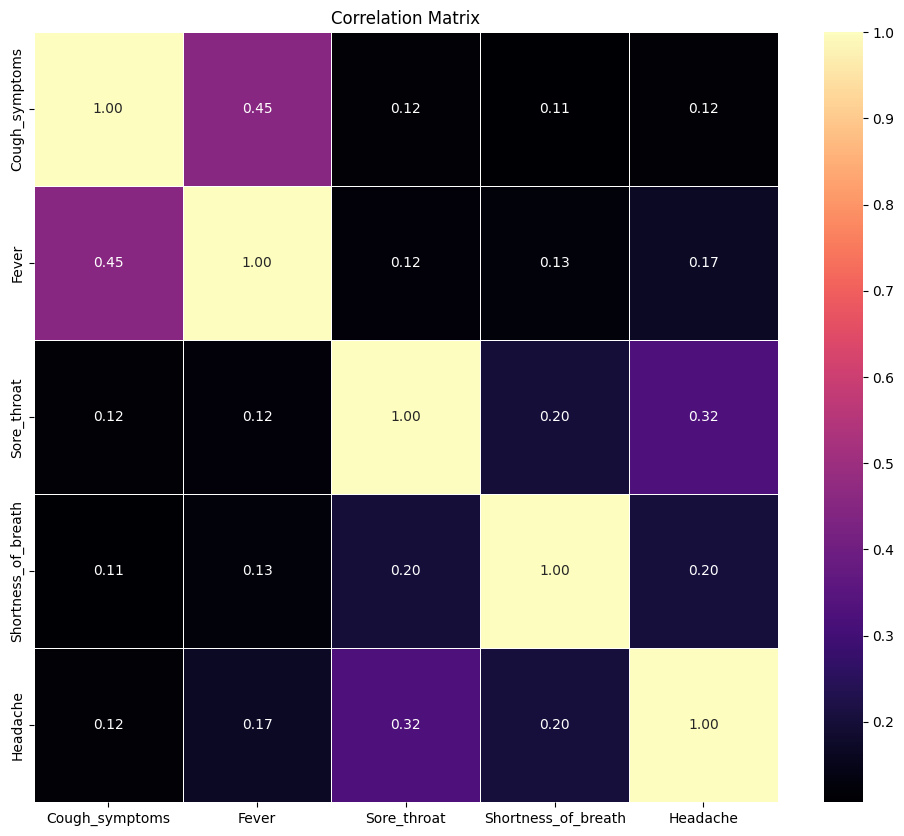

In [ ]:
#Correlation matrix using Heatmap
plt.figure(figsize=(12,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='magma',fmt='.2f',linewidth=.5)#Using Heatmap to show correlation matrix
plt.title('Correlation Matrix')#Title name

**4.2.1 Corona**

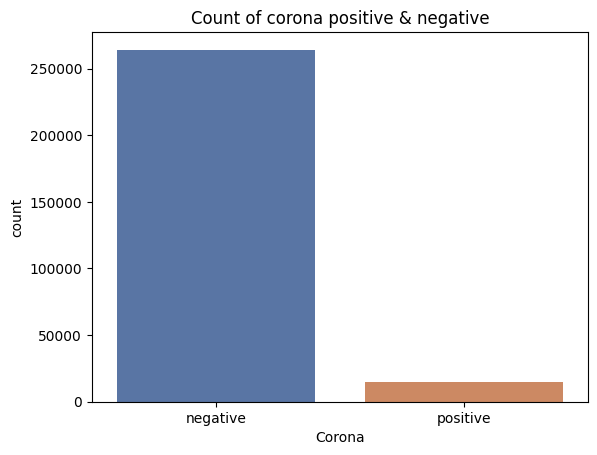

In [ ]:
#Countplot of individuals who are corona positive & negative.
sns.countplot(data=df,x='Corona',palette='deep')#To plot a countplot using seaborn library.
plt.title('Count of corona positive & negative')#Title name
plt.show()#To show the plot.

***Insights :***
* Count of Corona positive patient is 14,729.
* Count of Corona negative patient is 2,64,119.

In [ ]:
#Checking ratio of corona negative to positive
ratio=((df['Corona']=='negative').sum())/((df['Corona']=='positive').sum())
print('Ratio of Corona Negative to Positive patients : ',ratio)

Ratio of Corona Negative to Positive patients :  17.931903048407904


***Observation:***

* 1 in every 17 patient is corona positive.

Corona count of both categories : 
 negative    264119
positive     14729
Name: Corona, dtype: int64


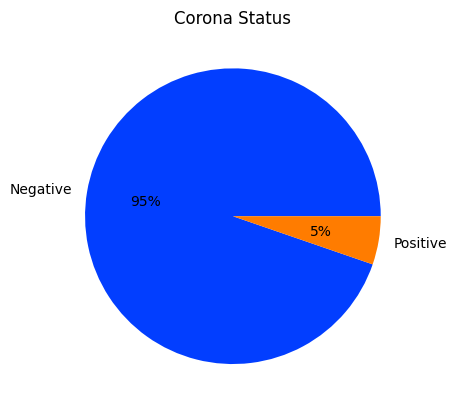

In [ ]:
#Checking percentage of corona positive & negative patients using pie plot
corona_status=df['Corona'].value_counts()#Value_counts is used to count the occurences of unique values
print('Corona count of both categories : \n', corona_status)
colors_=sns.color_palette('bright')#Defining color from color palette of seaborn.
plt.pie(corona_status,labels=['Negative','Positive'],colors=colors_,autopct='%.0f%%')#To plot a pie chart.
plt.title('Corona Status')#Title name
plt.show()#To show the plot.

***Insights:***
* 95% patients are corona negative
* Only 5% patients out of the total dataset is corona positive.

In [ ]:
#Checking Age_60_above patients with respect to corona
older_individuals=df['Age_60_above'].value_counts()#Counting occurences of unique values
print('Count of patients above & not above 60 : \n', older_individuals)
#Ratio of patients above 60 and positive
ratio=(df['Corona']=='positive').sum()/(df['Age_60_above']=='Yes').sum()
print('Ratio of corona positive to those more than 60 : ',ratio)

Count of patients above & not above 60 : 
 No     253023
Yes     25825
Name: Age_60_above, dtype: int64
Ratio of corona positive to those more than 60 :  0.5703388189738625


Text(0.5, 1.0, 'Age count of Individuals')

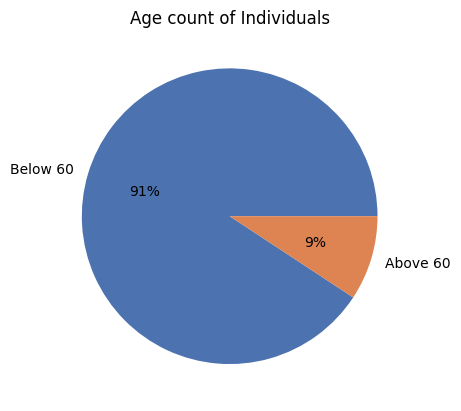

In [ ]:
#Displaying percentage of people above & below 60 using pie chart.
color=sns.color_palette('deep')#Defining the color
plt.pie(older_individuals,labels=['Below 60','Above 60'],colors=color,autopct='%.0f%%')#To plot a pie chart.
plt.title('Age count of Individuals')#Title name

***Insights:***

* People above 60 are 25,825 who are just 9% of total popluation used for analysis.
* People below 60 are 2,53,023 who are 91% of total population.

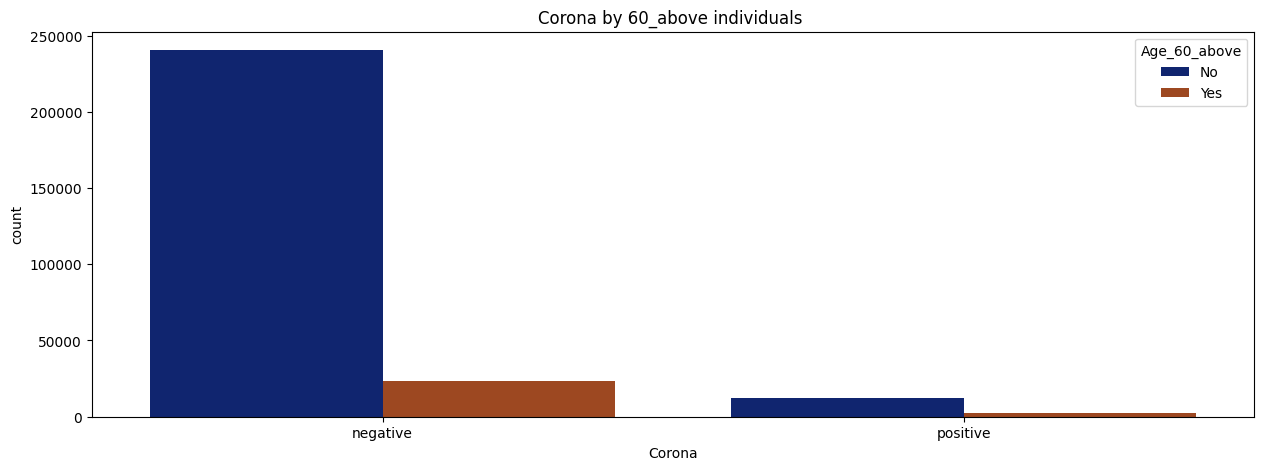

In [ ]:
#Countplot of Corona patients with respect to individuals age.
plt.figure(figsize=(15,5))#Defining the figure size
sns.countplot(data=df,x='Corona',hue='Age_60_above',palette='dark')#Countplot using seaborn.
plt.title('Corona by 60_above individuals ')#Title name
plt.show()#To show the plot.

***Insights:***
* Out of total positive cases that are 14,729 very few are having age more than 60.
* Below 60 people are more corona positive in comparison to people above 60.

***4.2.2 Sex***

Gender count : 
 female    149721
male      129127
Name: Sex, dtype: int64


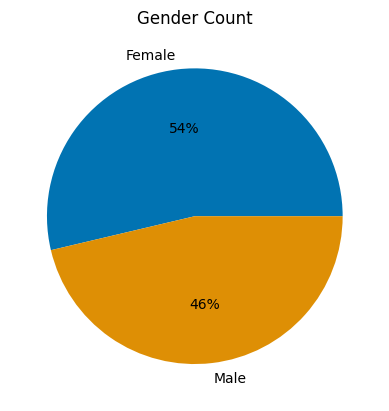

In [ ]:
#Count of Female and Male in Sex column.
gender_count=df['Sex'].value_counts()#Counting unique occurences in Sex column.
print('Gender count : \n', gender_count)
color=sns.color_palette('colorblind')#Defining the color
plt.pie(gender_count,labels=['Female','Male'],colors=color,autopct='%.0f%%')#To plot a pie chart.
plt.title('Gender Count')#Title name
plt.show()#To show the plot

***Insights :***

* Total Female population is 1,49,721 that is 54% of the population.
* Total Male population is 1,29,127 that is 46% of the population.

In [ ]:
#Male Individuals who are corona positive
total_male=((df['Corona']=='positive')&(df['Sex']=='male')).sum()#Total corona positive patients that are male.
print('Total Male corona patients : ',total_male)

Total Male corona patients :  7519


In [ ]:
#Female Individuals who are corona positive
total_female=((df['Corona']=='positive')&(df['Sex']=='female')).sum()#Total corona positive patients that are female.
print('Total female corona patients : ',total_female)

Total female corona patients :  7210


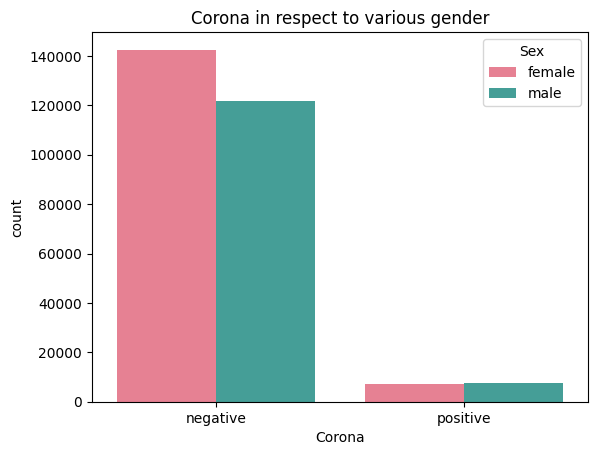

In [ ]:
#Sex by Corona
sns.countplot(data=df,x='Corona',hue='Sex',palette='husl')#Countplot of Corona with respect to gender
plt.title('Corona in respect to various gender')#Title name
plt.show()#To show the plot

***Insights:***
* Female Corona patients are 7,210.
* Male Corona patients are 7,519.
* Hence,we can say that male patients are more in comparison to female patients.

***4.2.3 Cough***

Cough count : 
 False    236620
True      42228
Name: Cough_symptoms, dtype: int64


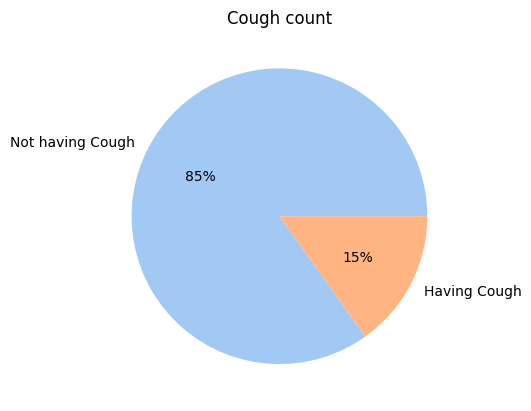

In [ ]:
#Count of people suffering with Cough
cough_count=df['Cough_symptoms'].value_counts()#Count of individuals having and not having cough symptoms.
print('Cough count : \n', cough_count)
color=sns.color_palette('pastel')#Defining the color
plt.pie(cough_count,labels=['Not having Cough','Having Cough'],colors=color,autopct='%.0f%%')#Plotting a pie chart.
plt.title('Cough count')#Title name
plt.show()#To show the plot

***Insights:***

* Out of total patients,  85% people are not suffering from cough.
* 15% patients have cough symptoms.

In [ ]:
#Count of corona patients having cough symptoms
total_corona_cough=((df['Corona']=='positive')&(df['Cough_symptoms']==True)).sum()
print('Total Corona patients having cough_symptoms : ',total_corona_cough)

Total Corona patients having cough_symptoms :  6584


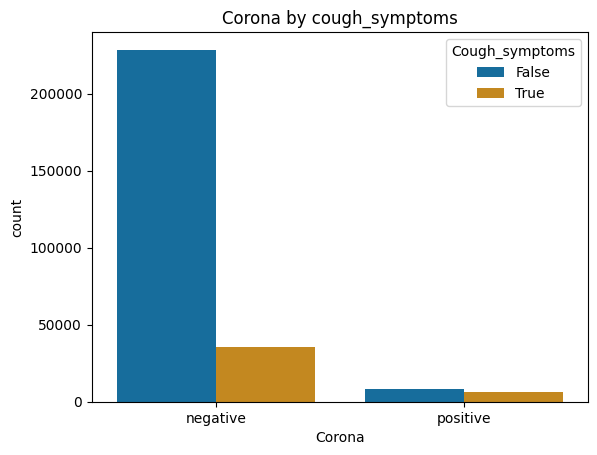

In [ ]:
sns.countplot(data=df,x='Corona',hue='Cough_symptoms',palette='colorblind')#Countplot using seaborn
plt.title('Corona by cough_symptoms')#Title name
plt.show()

In [ ]:
#Percentage of Corona patients suffering from Cough.
Count_of_corona_patients_suffering_from_cough=((((df['Corona']=='positive')&(df['Cough_symptoms']==True)).sum())/(df['Corona']=='positive').sum()) * 100
print('Count of Corona patients suffering from cough : ',  Count_of_corona_patients_suffering_from_cough)

Count of Corona patients suffering from cough :  44.70093013782334


In [ ]:
#Count of female having Cough_symptoms
female_cough_count=((df['Cough_symptoms']==True)&(df['Sex']=='female')).sum()
print('Total number of female having Cough Symptoms : ',female_cough_count)

Total number of female having Cough Symptoms :  21035


In [ ]:
#Count of male having Cough_symptoms
male_cough_count=((df['Cough_symptoms']==True)&(df['Sex']=='male')).sum()
print('Total number of male having Cough Symptoms : ',male_cough_count)

Total number of male having Cough Symptoms :  21193


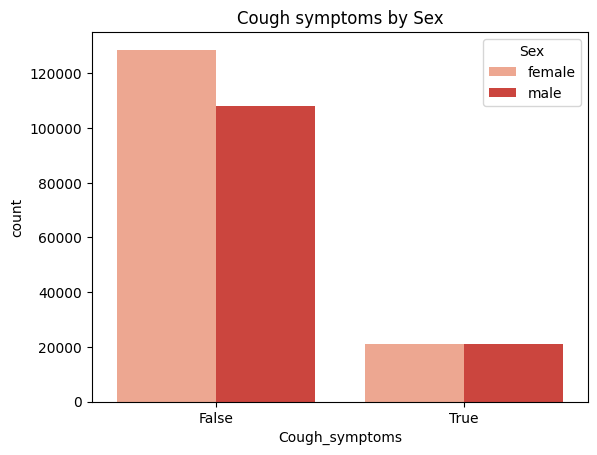

In [ ]:
sns.countplot(data=df,x='Cough_symptoms',hue='Sex',palette='Reds')#Countplot of cough_symptoms with respect to sex using seaborn
plt.title('Cough symptoms by Sex')#Title name
plt.show()

***Insights:***

* 2,36,620 people do not have any cough symptoms.
* 42,228 people are suffering from cough out of which only 6584 people are corona positive.
* 21,193 Males are suffering from cough and 21,035 Females are suffering from cough.
* 44.07% corona patients are suffering from cough.

***4.2.4 Fever***

Count of both categories of fever :  False    257096
True      21752
Name: Fever, dtype: int64


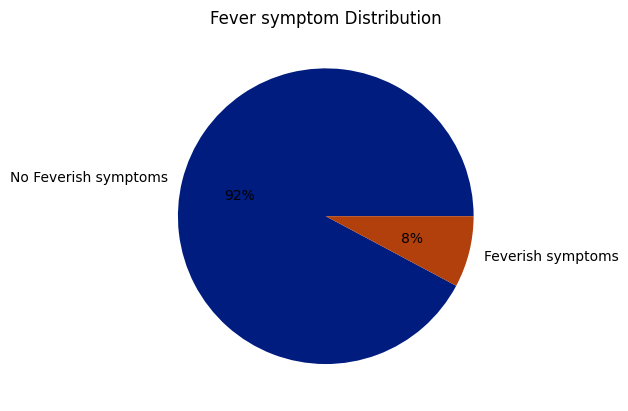

In [ ]:
#Count of people sufering from fever
fever_count=df['Fever'].value_counts()#Count of both categories of fever
print('Count of both categories of fever : ', fever_count)
color=sns.color_palette('dark')#Defining the color
plt.pie(fever_count,labels=['No Feverish symptoms','Feverish symptoms'],colors=color,autopct='%.0f%%')#Pie plot
plt.title('Fever symptom Distribution')
plt.show()

In [ ]:
#Percentage of corona patients suffering from fever.
corona_with_fever=((df['Fever']==True)&(df['Corona']=='positive')).sum()/(df['Corona']=='positive').sum()*100
print('Corona patients suffering from Fever(in %) : ',corona_with_fever)

Corona patients suffering from Fever(in %) :  37.74186978070473


In [ ]:
#Count of corona patients
corona_patients=(df['Corona']=='positive').sum()
print('Total number of Corona patients : ',corona_patients)

Total number of Corona patients :  14729


In [ ]:
#Count of corona patients having fever
corona_fever_count=((df['Fever']==True)&(df['Corona']=='positive')).sum()
print('Count of corona patients suffering from fever : ',corona_fever_count)

Count of corona patients suffering from fever :  5559


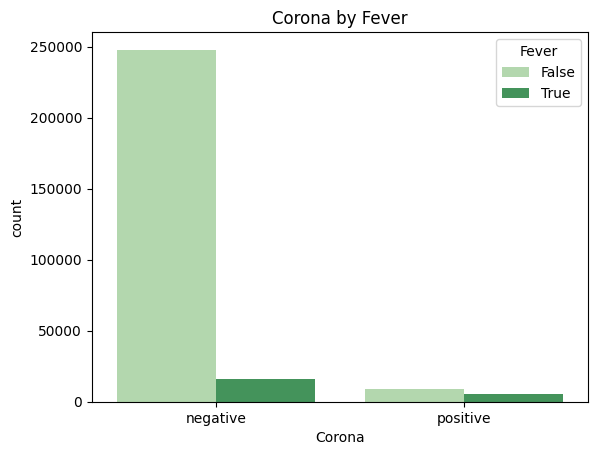

In [ ]:
#Fever by Corona
sns.countplot(data=df,x='Corona',hue='Fever',palette='Greens')#Countplot of corona by fever
plt.title('Corona by Fever')
plt.show()

In [ ]:
#Sum of females having fever
female_fever=((df['Fever']==True)&(df['Sex']=='female')).sum()
print('Total number of females having Feverish symptoms : ',female_fever)

Total number of females having Feverish symptoms :  10444


In [ ]:
#Sum of males having fever
male_fever=((df['Fever']==True)&(df['Sex']=='male')).sum()
print('Total number of males having feverish symptoms : ',male_fever)

Total number of males having feverish symptoms :  11308


***Insights:***
* Total number of people suffering from fever are 21,752 out of which 5,559 are corona positive.
* 37% Corona patients are having Feverish symptoms
* 11,308 Males are suffering from fever.
*10,444 Females are suffering from fever.
* Hence,we can say that males are more who suffered from fever.




***4.2.5 Sore_throat***

In [ ]:
#Count of people suffering from sore_throat
sore_throat_count=(df['Sore_throat']==True).sum()
print('Count of people suffering from sore throat : ',sore_throat_count)

Count of people suffering from sore throat :  1926


In [ ]:
#Corona patients suffering from Sore_throat
corona_sore_throat=((df['Corona']=='positive')&(df['Sore_throat']==True)).sum()
print('Count of Corona patients having sore throat problem : ',corona_sore_throat)

Count of Corona patients having sore throat problem :  1526


In [ ]:
#Patients having Sore_throat problem but are Corona negative
corona_neg_sore_throat=((df['Corona']=='negative')&(df['Sore_throat']==True)).sum()
print('Corona negative people having sore throat problem : ',corona_neg_sore_throat)

Corona negative people having sore throat problem :  400


In [ ]:
#Percentage of Corona patients suffering from Sore_throat
corona_pos_sore_throat=((df['Corona']=='positive')&(df['Sore_throat']==True)).sum()/((df['Corona']=='positive')).sum() *100
print('Percentage of Corona patients having sore throat problem : ',corona_pos_sore_throat)

Percentage of Corona patients having sore throat problem :  10.360513273134632


***Insights :***
* 10.36% Corona patients are suffering from Sore_throat.

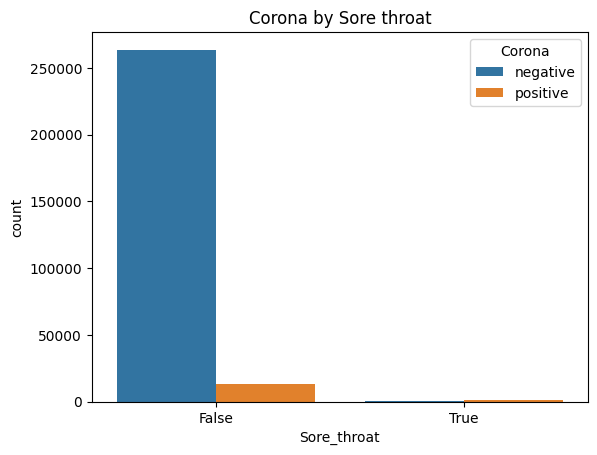

In [ ]:
#Corona by sore_throat
sns.countplot(data=df,x='Sore_throat',hue='Corona')#Countplot
plt.title('Corona by Sore throat')#Title name
plt.show()

***Insights:***
* Total 1926 people are having Sore_throat problem
* Out of 1926 people , only 1526 are corona positive and remaining 400 are corona negative.

***4.2.6 Shortness_of_breath:***

In [ ]:
#Count of patients suffering from Shortness_of_breath
shortness_of_breath_count=(df['Shortness_of_breath']==True).sum()
print('Total patients of Shortness of breath : ',shortness_of_breath_count)

Total patients of Shortness of breath :  1577


In [ ]:
corona_pos_shortnessbreath=((df['Shortness_of_breath']==True)&(df['Corona']=='positive')).sum()
print('Count of Corona patients suffering from shortness of breath : ',corona_pos_shortnessbreath)

Count of Corona patients suffering from shortness of breath :  1164


Text(0.5, 1.0, 'Corona by Shortness_of_breath')

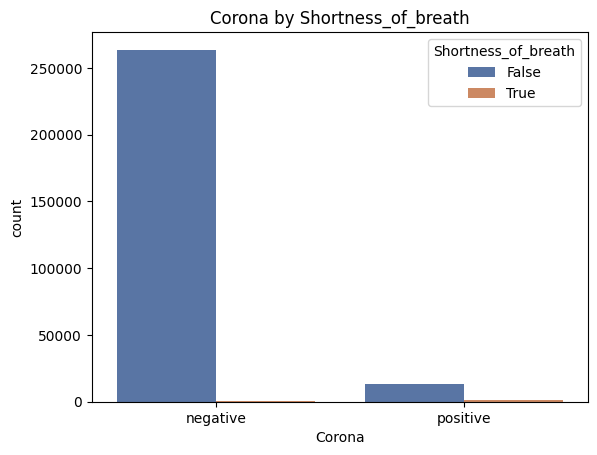

In [ ]:
sns.countplot(data=df,x='Corona',hue='Shortness_of_breath',palette='deep')#Countplot
plt.title('Corona by Shortness_of_breath')#Title name

In [ ]:
#Percentage of corona positive suffering from shortness of breath
percentage_corona_shortness=((df['Shortness_of_breath']==True)&(df['Corona']=='positive')).sum()/(df['Corona']=='positive').sum() *100
print('Percentage of Corona patients suffering from shortness of breath : ',percentage_corona_shortness)

Percentage of Corona patients suffering from shortness of breath :  7.902776834815669


***Insights:***
* 1577 patients are suffering from Shortness of breath.
* Out of 1577, 1164 patients are corona positive.
* 7.9% Corona patients have the problem of shortness of breath.

***4.2.7 Headache***

In [ ]:
#Count of patients having headache problem
headache_count=(df['Headache']==True).sum()
print('Total patients suffering from headache : ',headache_count)

Total patients suffering from headache :  2414


In [ ]:
#Count of corona patients having headache
corona_headache_count=((df['Headache']==True)&(df['Corona']=='positive')).sum()
print('Count of Corona patients suffering from Headache : ',corona_headache_count)

Count of Corona patients suffering from Headache :  2235


In [ ]:
#Percentage of corona patients having headache
per_corona_head=((df['Headache']==True)&(df['Corona']=='positive')).sum()/(df['Corona']=='positive').sum() * 100
print('Percentage of Corona patients having headache : ',per_corona_head)

Percentage of Corona patients having headache :  15.174146242107406


In [ ]:
#Count of corona patients not suffering from headache
corona_no_headache=((df['Corona']=='positive')&(df['Headache']==False)).sum()
print('Count of corona patients not having Headache problem : ',corona_no_headache)

Count of corona patients not having Headache problem :  12494


Text(0.5, 1.0, 'Corona by Headache')

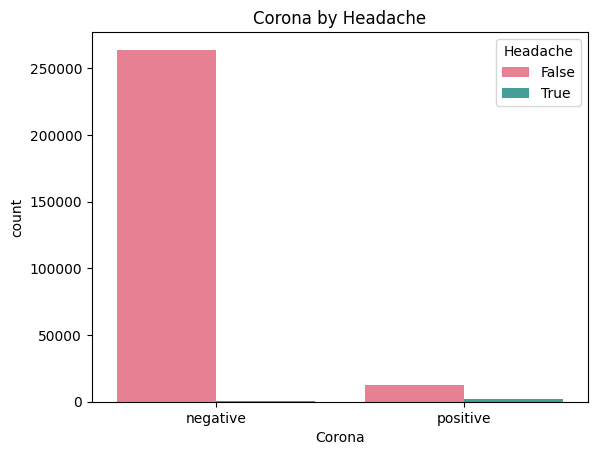

In [ ]:
#Corona by Headache
sns.countplot(data=df,x='Corona',hue='Headache',palette='husl')#Countplot
plt.title('Corona by Headache')#Title name

***Insights:***
* Total patients suffering from headache are 2414, out of which 2235 are corona patients.
*Only 15.17% corona patients are suffering from headache.

***4.2.8 Known Contact***

In [ ]:
contact_count=df['Known_contact'].value_counts()
print('Count of patients contact : \n',contact_count)

Count of patients contact : 
 Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


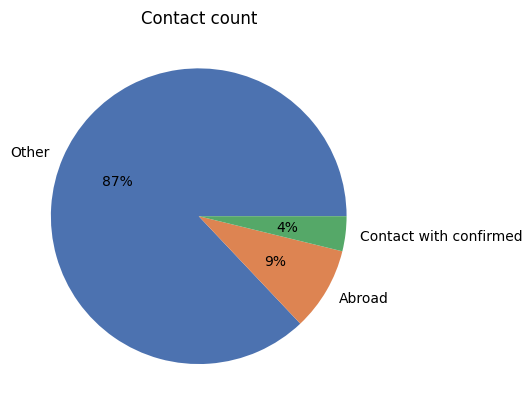

In [ ]:
color=sns.color_palette('deep')
plt.pie(contact_count,labels=['Other','Abroad','Contact with confirmed'],colors=color,autopct='%.0f%%')
plt.title('Contact count')
plt.show()

***5. Feature Engineering***

It is the process of taking the raw data,processing it,selecting,manipulating and transforming the raw data in order to extract features from it that are best for the ML Models.

***5.1 Converting Corona column categorical data to numerical data***

In [ ]:
df['Corona']=df['Corona'].map({'negative' : 0, 'positive' : 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       278848 non-null  bool  
 1   Fever                278848 non-null  bool  
 2   Sore_throat          278848 non-null  bool  
 3   Shortness_of_breath  278848 non-null  bool  
 4   Headache             278848 non-null  bool  
 5   Corona               278848 non-null  int64 
 6   Age_60_above         278848 non-null  object
 7   Sex                  278848 non-null  object
 8   Known_contact        278848 non-null  object
dtypes: bool(5), int64(1), object(3)
memory usage: 9.8+ MB


In [ ]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,0,No,female,Abroad
1,False,True,False,False,False,1,No,female,Abroad
2,False,True,False,False,False,1,No,female,Abroad
3,True,False,False,False,False,0,No,female,Abroad
4,True,False,False,False,False,0,No,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,1,No,male,Other
278844,False,False,False,False,False,0,No,female,Other
278845,False,False,False,False,False,0,No,male,Other
278846,False,False,False,False,False,0,No,male,Other


So we can see that Corona has only 0 & 1 values in which 0 signifies negative and 1 signifies positive.

* From df.info() we can clearly see that there are only boolean and object datatype for all columns except Corona column.
* So now we will convert these boolean and object datatype to integer datatype.
* Conversion of all datatype into integer is required because machine understands only numerical variables.

In [ ]:
#Fetching unique values of Independent variables
print(df['Cough_symptoms'].unique())
print(df['Fever'].unique())
print(df['Sore_throat'].unique())
print(df['Shortness_of_breath'].unique())
print(df['Headache'].unique())
print(df['Age_60_above'].unique())
print(df['Sex'].unique())
print(df['Known_contact'].unique())

[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
['No' 'Yes']
['female' 'male']
['Abroad' 'Contact with confirmed' 'Other']


***6.Modelling***

In this section we are going to build different machine learning model in order to solve the problem statement.

***Problem statement:*** Identify whether an individual is corona positive or not?

***Solution:*** As we can see from the problem statement that the output is of discrete in nature.So it is a classification problem.
Now we will see various classification model to predict whether an individual is corona positive or not and in the last we will compare these model and select which model is best for this problem statement.

***6.1 Decision Tree Classifier***

In [ ]:
#Features and target variable
x=df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
y=df['Corona']

#Converting categorical data into numerical data using One-hot Encoding
x=pd.get_dummies(x,columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact'])

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Initializing a model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()#model name
dt.fit(x_train,y_train)#training the model

#Predictions
y_pred_test=dt.predict(x_test)
y_pred_train=dt.predict(x_train)

#Evaluation
from sklearn.metrics import accuracy_score
dt_test_accuracy=accuracy_score(y_test,y_pred_test)#test accuracy
dt_train_accuracy=accuracy_score(y_train,y_pred_train)#train accuracy
print('Train Accuracy : ',dt_train_accuracy)
print('Test Accuracy :',dt_test_accuracy)
print('----------------------------------------------------------------------------------------')

#Classification report
from sklearn.metrics import classification_report
print('Classification report : \n',classification_report(y_test,y_pred_test))

#Cross validation score
#Cross validation score
from sklearn.model_selection import cross_val_score
print('Cross Validation score : ',cross_val_score(dt,x_train,y_train,cv=5).mean())

#Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred_test))

Train Accuracy :  0.9682980840782148
Test Accuracy : 0.9667921821767975
----------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     52814
           1       0.77      0.53      0.63      2956

    accuracy                           0.97     55770
   macro avg       0.87      0.76      0.80     55770
weighted avg       0.96      0.97      0.96     55770

Cross Validation score :  0.9679305035203362
Confusion matrix : 
 [[52360   454]
 [ 1398  1558]]


* Train accuracy is not very much higher than test accuracy so there is no overfitting problem.
* There is no requirement of pruning in decision tree.
* Pruning is a procedure of reducing the depth of the decision tree to eliminate the overfitting problem.

* Cross-validation is a technique used to assess the performance and generalization ability of a model by splitting the dataset into multiple subsets, training the model on different subsets, and evaluating its performance on the remaining data.

* We can use cross-validation to tune hyperparameters, avoid overfitting, and get a more reliable estimate of the model's performance on unseen data.

* A confusion matrix is a table that summarizes the performance of a classification algorithm by presenting counts of true positive, true negative, false positive, and false negative predictions, enabling the assessment of model accuracy and errors.

* A classification report provides a comprehensive summary of a classification model's performance, including metrics such as precision, recall, F1-score, and support for each class. It aids in evaluating the model's effectiveness across multiple classes.

***6.2 Random Forest***

In [ ]:
#Features and target variable
x=df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
y=df['Corona']

#Converting categorical data into numerical data using One-hot Encoding
x=pd.get_dummies(x,columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact'])

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Initializing a model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()#model name
rf.fit(x_train,y_train)#training the model

#Predictions
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

#Evaluation
from sklearn.metrics import accuracy_score
rf_train_accuracy=accuracy_score(y_train,y_pred_train)#train accuracy
rf_test_accuracy=accuracy_score(y_test,y_pred_test)#test accuracy
print('Train Accuracy : ',rf_train_accuracy)
print('Test Accuracy :',rf_test_accuracy)
print('----------------------------------------------------------------------------------------')

#Classification report
from sklearn.metrics import classification_report
print('Classification report : \n',classification_report(y_test,y_pred_test))
print('-----------------------------------------------------------------------------------------')

#Cross validation score
from sklearn.model_selection import cross_val_score
print('Cross Validation score : ',cross_val_score(rf,x_train,y_train,cv=5).mean())

#Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred_test))

Train Accuracy :  0.9682980840782148
Test Accuracy : 0.9669714900484131
----------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     52814
           1       0.78      0.53      0.63      2956

    accuracy                           0.97     55770
   macro avg       0.87      0.76      0.81     55770
weighted avg       0.96      0.97      0.96     55770

-----------------------------------------------------------------------------------------
Cross Validation score :  0.9680694685274898
Confusion matrix : 
 [[52360   454]
 [ 1388  1568]]


***6.3 AdaBoost Classifier***

In [ ]:
#Features and target variable
x=df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
y=df['Corona']

#Converting categorical data into numerical data using One-hot Encoding
x=pd.get_dummies(x,columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact'])

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Initializing a model
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=80)
adb.fit(x_train,y_train)

#Predictions
y_pred_test=adb.predict(x_test)
y_pred_train=adb.predict(x_train)

#Evaluation
from sklearn.metrics import accuracy_score
adb_train_accuracy=accuracy_score(y_train,y_pred_train)
adb_test_accuracy=accuracy_score(y_test,y_pred_test)
print('Train Accuracy : ',adb_train_accuracy)
print('Test Accuracy :',adb_test_accuracy)
print('----------------------------------------------------------------------------------------')

#Classification report
from sklearn.metrics import classification_report
print('Classification report : \n',classification_report(y_test,y_pred_test))
print('----------------------------------------------------------------------------------------')

#Cross validation score
from sklearn.model_selection import cross_val_score
print('Cross Validation score : ',cross_val_score(adb,x_train,y_train,cv=5).mean())

#Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred_test))


Train Accuracy :  0.959619505285147
Test Accuracy : 0.9587950511027434
----------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     52814
           1       0.73      0.35      0.48      2956

    accuracy                           0.96     55770
   macro avg       0.85      0.67      0.73     55770
weighted avg       0.95      0.96      0.95     55770

----------------------------------------------------------------------------------------
Cross Validation score :  0.9595343341618309
Confusion matrix : 
 [[52431   383]
 [ 1915  1041]]


***6.4 XGBoost Classifier***

In [ ]:
#Features and target variable
x=df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
y=df['Corona']

#Converting categorical data into numerical data using One-hot Encoding
x=pd.get_dummies(x,columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact'])

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Initializing a model
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

#Predictions
y_pred_test=xg.predict(x_test)
y_pred_train=xg.predict(x_train)

#Evaluation
from sklearn.metrics import accuracy_score
xg_train_accuracy=accuracy_score(y_train,y_pred_train)
xg_test_accuracy=accuracy_score(y_test,y_pred_test)
print('Train Accuracy : ',xg_train_accuracy)
print('Test Accuracy :',xg_test_accuracy)
print('----------------------------------------------------------------------------------------')

#Classification Report
from sklearn.metrics import classification_report
print('Classification report : \n',classification_report(y_test,y_pred_test))
print('------------------------------------------------------------------------------------------')

#Cross Validation Score
from sklearn.model_selection import cross_val_score
print('Cross Validation score : ',cross_val_score(xg,x_train,y_train,cv=5).mean())

#Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred_test))

Train Accuracy :  0.9682980840782148
Test Accuracy : 0.96693562847409
----------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     52814
           1       0.77      0.53      0.63      2956

    accuracy                           0.97     55770
   macro avg       0.87      0.76      0.81     55770
weighted avg       0.96      0.97      0.96     55770

------------------------------------------------------------------------------------------
Cross Validation score :  0.9680380894490067
Confusion matrix : 
 [[52358   456]
 [ 1388  1568]]


***6.5 Comparison of Test Accuracy of all the models***

In [ ]:
models=pd.DataFrame({
                'Models':['Decision Tree','Random Forest','AdaBoost','XGBoost'],
                'Accuracy Scores':[dt_test_accuracy,rf_test_accuracy,adb_test_accuracy,xg_test_accuracy]
})

models.sort_values(by='Accuracy Scores',ascending=False)

,Models,Accuracy Scores
1,Random Forest,0.966971
3,XGBoost,0.966936
0,Decision Tree,0.966792
2,AdaBoost,0.958795


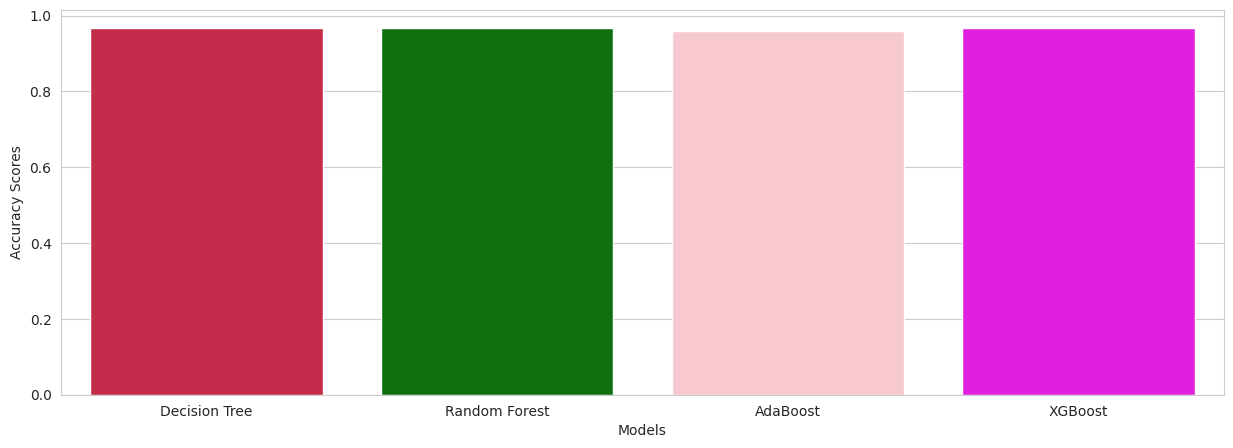

In [ ]:
colors = ["crimson", "green", "pink", "magenta","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Models'],y=models['Accuracy Scores'], palette=colors )
plt.show()

***Conclusion:***


* Accuracy score of Decision tree Classifier is 96.679%.
* Accuracy score of Random Forest Classifier is 96.697%.
* Accuracy score of AdaBoost Classifier is 95.879%.
* Accuracy score of XGBoost Classifier is 96.693%.
* Hence,we can conclude that Random Forest Classifier is the best model.